In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import necessary libraries
import pandas as pd

# Load the dataset from an Excel file
df = pd.read_excel('Mobile_Dataset.xlsx')  # Replace with your actual Excel file path

# Display the first few rows and columns of the DataFrame to understand its structure
print(df.head())
print(df.columns)

  Brand    Model            Color  Price  Review  RAM  ROM  Height  Width  \
0  Vivo      T3x    Crimson Bliss  13499     4.5    4  128   17.07   6.72   
1  Vivo  T3 Lite   Majestic Black  11499     4.4    6  128   16.66   6.56   
2  Vivo  T3 Lite   Majestic Black  10499     4.4    4  128   16.66   6.56   
3  Vivo      T3x  Celestial Green  16499     4.4    8  128   17.07   6.72   
4  Vivo      T3x    Crimson Bliss  16499     4.4    8  128   17.07   6.72   

   Main_Cam  Extra_Cam  Front_Cam  Battery  Processor  
0        50          2          8     6000        NaN  
1        50          2          8     5000     6300.0  
2        50          2          8     5000     6300.0  
3        50          2          8     6000        NaN  
4        50          2          8     6000        NaN  
Index(['Brand', 'Model', 'Color', 'Price', 'Review', 'RAM', 'ROM', 'Height',
       'Width', 'Main_Cam', 'Extra_Cam', 'Front_Cam', 'Battery', 'Processor'],
      dtype='object')


In [3]:
# Fill NaN values in the 'Processor' column with a placeholder (e.g., "Unknown Processor")
df['Processor'] = df['Processor'].fillna('Unknown')

# Fill NaN values in the 'Color' column with 'Unknown'
df['Color'] = df['Color'].fillna('Unknown')

# Fill NaN values in the 'Review' column with the mean value of the column
df['Review'] = df['Review'].fillna(df['Review'].mean())

In [4]:
# Convert 'Brand', 'Color', and 'Processor' columns to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['Brand', 'Color', 'Processor'], drop_first=True)

# Display the first few rows to verify the encoding
print(df.head())


     Model  Price  Review  RAM  ROM  Height  Width  Main_Cam  Extra_Cam  \
0      T3x  13499     4.5    4  128   17.07   6.72        50          2   
1  T3 Lite  11499     4.4    6  128   16.66   6.56        50          2   
2  T3 Lite  10499     4.4    4  128   16.66   6.56        50          2   
3      T3x  16499     4.4    8  128   17.07   6.72        50          2   
4      T3x  16499     4.4    8  128   17.07   6.72        50          2   

   Front_Cam  ...  Processor_7020.0  Processor_7025.0  Processor_7050.0  \
0          8  ...             False             False             False   
1          8  ...             False             False             False   
2          8  ...             False             False             False   
3          8  ...             False             False             False   
4          8  ...             False             False             False   

   Processor_7200.0  Processor_7300.0  Processor_7350.0  Processor_8020.0  \
0             False  

In [5]:
# Set 'Review' as the target variable (y) and drop 'Model' column as it's not useful for prediction
y = df['Review']  # Target variable
X = df.drop(['Review', 'Model'], axis=1)  # Features (everything except 'Review' and 'Model')

# Display the shape of X and y to verify
print(X.shape, y.shape)


(312, 206) (312,)


In [6]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(249, 206) (63, 206) (249,) (63,)


In [7]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the scaled feature set for verification
print(X_train_scaled[:5])

[[ 0.2294685   0.30780936 -0.52208711 ... -0.17007534 -0.12777531
  -1.32916014]
 [-0.34494615  0.30780936 -0.52208711 ... -0.17007534 -0.12777531
  -1.32916014]
 [-0.94808153 -0.3102917  -0.52208711 ... -0.17007534 -0.12777531
   0.75235479]
 [ 0.11458557  0.30780936  0.88712362 ... -0.17007534 -0.12777531
  -1.32916014]
 [ 0.14841859  0.30780936  0.88712362 ... -0.17007534 -0.12777531
   0.75235479]]


In [8]:
from sklearn.ensemble import RandomForestRegressor

# Train a RandomForestRegressor for regression (since we're predicting continuous values)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Output the training completion message
print("Model training completed.")


Model training completed.


In [9]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.007549449639718055
R^2 Score: 0.7474396019888658


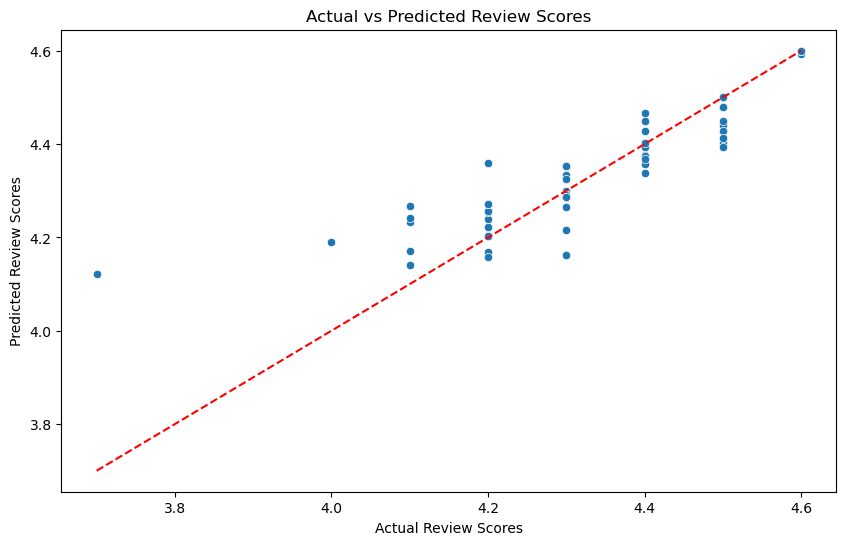

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Review Scores')
plt.ylabel('Predicted Review Scores')
plt.title('Actual vs Predicted Review Scores')
plt.show()


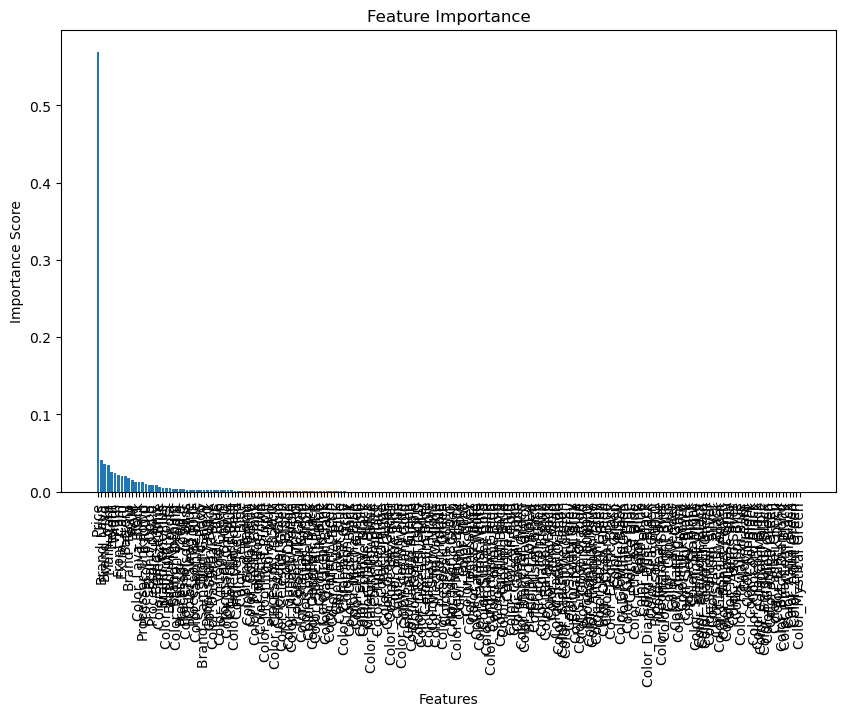

In [11]:
# Get feature importances from the trained model
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


In [12]:
import joblib  # Ensure you import joblib at the top of your file

# Save the trained model
joblib.dump(model, 'random_forest_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler have been saved successfully.")

Model and scaler have been saved successfully.
